In [ ]:
#Load the file
import pandas as pd

# Load the uploaded Excel file
df = pd.read_excel("Cleaned_Preprocessed_Dataset_Week1.xlsx")

# 🧾 Preview
df.head()




['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name', 'Opportunity Category', 'Opportunity End Date', 'First Name', 'Date of Birth', 'Gender', 'Country', 'Institution Name', 'Current/Intended Major', 'Entry created at', 'Status Description', 'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age', 'SignUp Month', 'SignUp Year', 'Normalized Status Code', 'Normalized Age', 'Gender Encoded', 'Engagement Score', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Descriptive Stastistics', 'Unnamed: 28']


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Web Extension extension is not supported and will be removed
  warn(msg)


In [ ]:
print(df.columns.tolist())

['learner_signup_datetime', 'opportunity_id', 'opportunity_name', 'opportunity_category', 'opportunity_end_date', 'first_name', 'date_of_birth', 'gender', 'country', 'institution_name', 'current/intended_major', 'entry_created_at', 'status_description', 'status_code', 'apply_date', 'opportunity_start_date', 'age', 'signup_month', 'signup_year', 'normalized_status_code', 'normalized_age', 'gender_encoded', 'engagement_score', 'unnamed:_23', 'unnamed:_24', 'unnamed:_25', 'unnamed:_26', 'descriptive_stastistics', 'unnamed:_28']


In [12]:
#cleaning
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 3. Convert signup and apply dates to datetime format
df['learner_signup_datetime'] = pd.to_datetime(df['learner_signup_datetime'], errors='coerce')
df['apply_date'] = pd.to_datetime(df['apply_date'], errors='coerce')

# 4. Create application lag (in days)
df['application_lag_days'] = (df['apply_date'] - df['learner_signup_datetime']).dt.days

# 5. Create churn column: 1 if status is 'not started' or 'applied', else 0
df['churned'] = df['status_description'].apply(lambda x: 1 if str(x).lower() in ['not started', 'applied'] else 0)


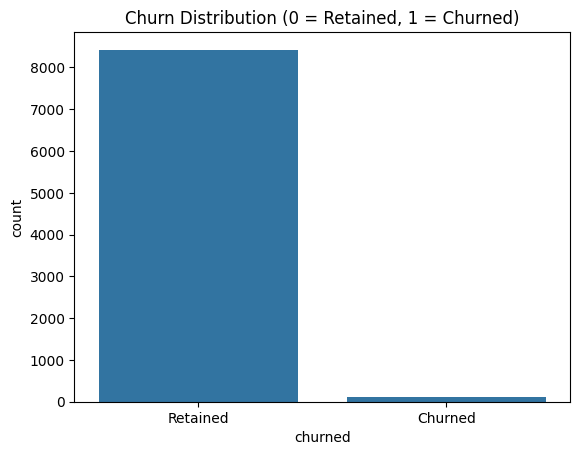

In [13]:
#Churn's EDA (EXPLORATORY DATA ANALYSIS)
# 1. Churn Distribution
sns.countplot(x='churned', data=df)
plt.title('Churn Distribution (0 = Retained, 1 = Churned)')
plt.xticks([0,1], ['Retained', 'Churned'])
plt.show()


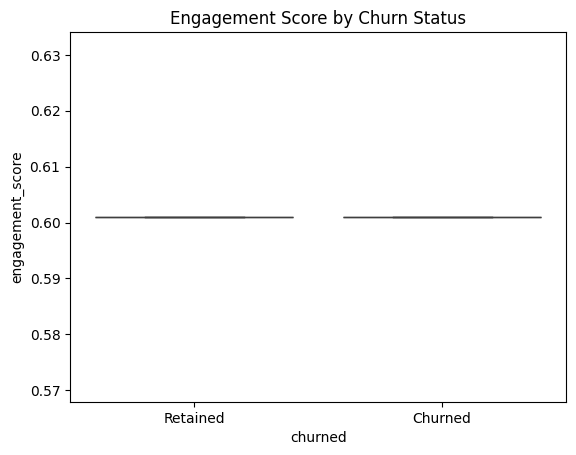

In [14]:
# 2. Engagement Score vs Churn
sns.boxplot(x='churned', y='engagement_score', data=df)
plt.title('Engagement Score by Churn Status')
plt.xticks([0,1], ['Retained', 'Churned'])
plt.show()


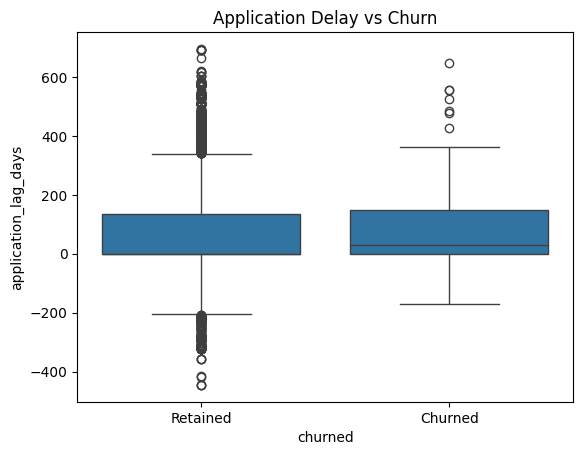

In [15]:
# 4. Application Delay vs Churn
sns.boxplot(x='churned', y='application_lag_days', data=df)
plt.title('Application Delay vs Churn')
plt.xticks([0,1], ['Retained', 'Churned'])
plt.show()


In [16]:
# Compare average metrics between churned and retained students for features
summary = df.groupby('churned')[[
    'age',
    'application_lag_days',
    'engagement_score',
    'normalized_status_code',
    'normalized_age'
]].mean()

print("Mean comparison of key features by churn status:")
print(summary)


Mean comparison of key features by churn status:
               age  application_lag_days  engagement_score  \
churned                                                      
0        25.112417             67.121500          0.601011   
1        24.704762             94.901961          0.601011   

         normalized_status_code  normalized_age  
churned                                          
0                       0.42519        0.367546  
1                       0.00000        0.359707  


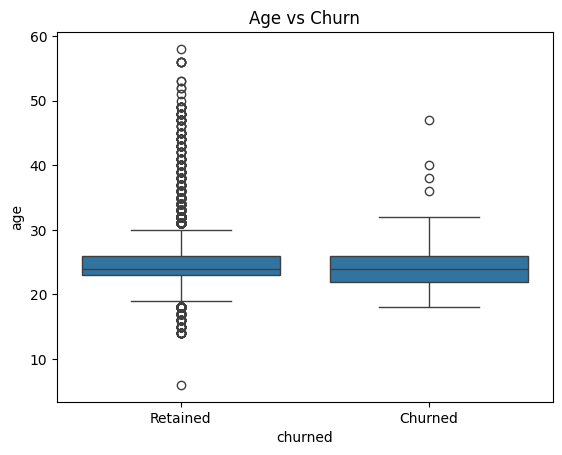

In [17]:
#AGE BY CHURN
sns.boxplot(x='churned', y='age', data=df)
plt.title('Age vs Churn')
plt.xticks([0,1], ['Retained', 'Churned'])
plt.show()


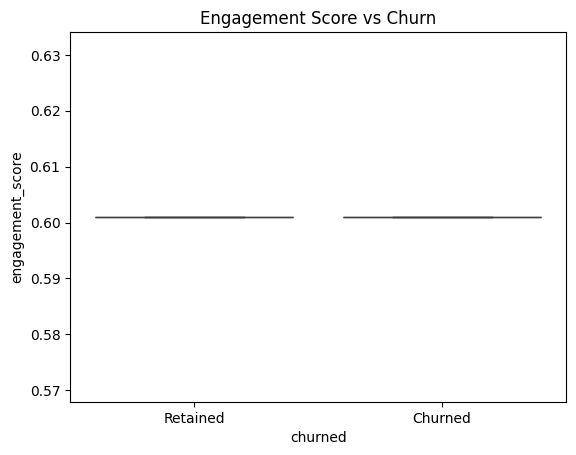

engagement_score
0.601011    8529
Name: count, dtype: int64
Standard Deviation: 3.730568068182202e-14


In [18]:
#Engagement Score by Churn
sns.boxplot(x='churned', y='engagement_score', data=df)
plt.title('Engagement Score vs Churn')
plt.xticks([0,1], ['Retained', 'Churned'])
plt.show()

print(df['engagement_score'].value_counts())
print("Standard Deviation:", df['engagement_score'].std())


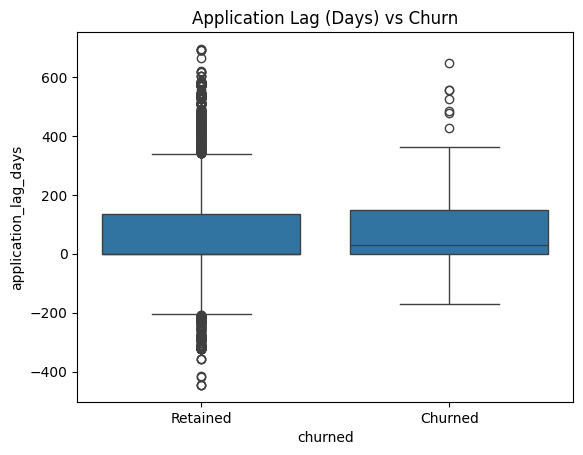

In [19]:
#Application Lag by Churn
sns.boxplot(x='churned', y='application_lag_days', data=df)
plt.title('Application Lag (Days) vs Churn')
plt.xticks([0,1], ['Retained', 'Churned'])
plt.show()


In [20]:
#How Many Churned vs Retained Overall
churn_counts = df['churned'].value_counts()
print("Churn vs Retained counts:")
print(churn_counts)


Churn vs Retained counts:
churned
0    8424
1     105
Name: count, dtype: int64


Churn vs Retention Percentage:
churned
0    98.768906
1     1.231094
Name: proportion, dtype: float64


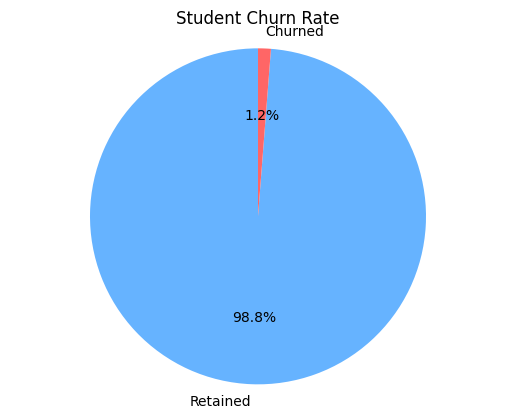

In [21]:
#percentage churn rate
churn_percentage = df['churned'].value_counts(normalize=True) * 100
print("Churn vs Retention Percentage:")
print(churn_percentage)
import seaborn as sns
import matplotlib.pyplot as plt

# Pie chart of churn distribution
labels = ['Retained', 'Churned']
sizes = df['churned'].value_counts(normalize=True) * 100
colors = ['#66b3ff','#ff6666']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Student Churn Rate')
plt.axis('equal')
plt.show()


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Web Extension extension is not supported and will be removed
  warn(msg)


Feature Importances:
 application_lag_days    0.708533
age                     0.150675
normalized_age          0.140791
dtype: float64


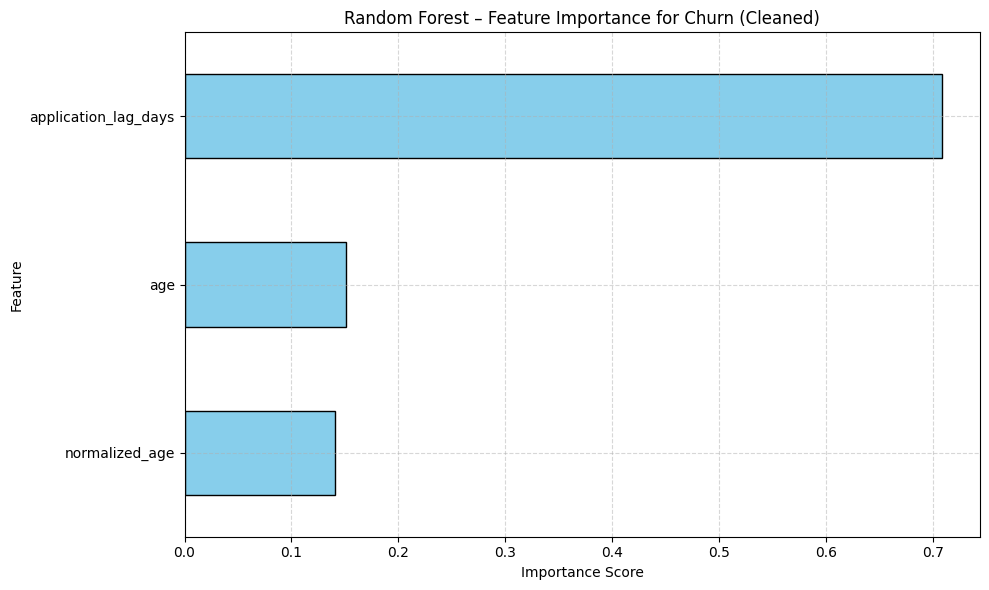

In [22]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load dataset
df = pd.read_excel("Cleaned_Preprocessed_Dataset_Week1.xlsx")

# Step 3: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 4: Convert date columns
df['learner_signup_datetime'] = pd.to_datetime(df['learner_signup_datetime'], errors='coerce')
df['apply_date'] = pd.to_datetime(df['apply_date'], errors='coerce')
df['opportunity_start_date'] = pd.to_datetime(df['opportunity_start_date'], errors='coerce')

# Step 5: Feature engineering
df['application_lag_days'] = (df['apply_date'] - df['learner_signup_datetime']).dt.days
df['days_since_opportunity_start'] = (df['opportunity_start_date'] - df['opportunity_start_date'].min()).dt.days

# Step 6: Churn flag
df['churned'] = df['status_description'].apply(lambda x: 1 if str(x).lower() in ['not started', 'applied'] else 0)

# Step 7: Balance the dataset
churned = df[df['churned'] == 1]
retained = df[df['churned'] == 0].sample(n=300, random_state=42)
df_balanced = pd.concat([churned, retained])

# Step 8: Use only high-variance features
features = [
    'application_lag_days',
    'age',
    'normalized_age'
]

# Step 9: Prepare X and y
X = df_balanced[features].dropna()
y = df_balanced['churned'].loc[X.index]

# Step 10: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 11: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 12: Print and plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:\n", importances)

importances.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("Random Forest – Feature Importance for Churn (Cleaned)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
